# Music Recommendation Project
Dataset=https://research.google.com/audioset/download.html
In this notebook, basically the data is decompressed and converted to JSON file so that it could be worked on.

In [56]:
#importing libraries

In [57]:
import os
import sys
import json
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import glob
from sklearn.metrics.pairwise import cosine_similarity


In [58]:
#current directory

In [59]:
cd 

C:\Users\yashs


In [60]:
import os
 
# change the current directory
# to specified directory
os.chdir(r"D:\education\machine learning\projects\spotify")

In [61]:
cwd = os.getcwd()
cwd
#current working directory

'D:\\education\\machine learning\\projects\\spotify'

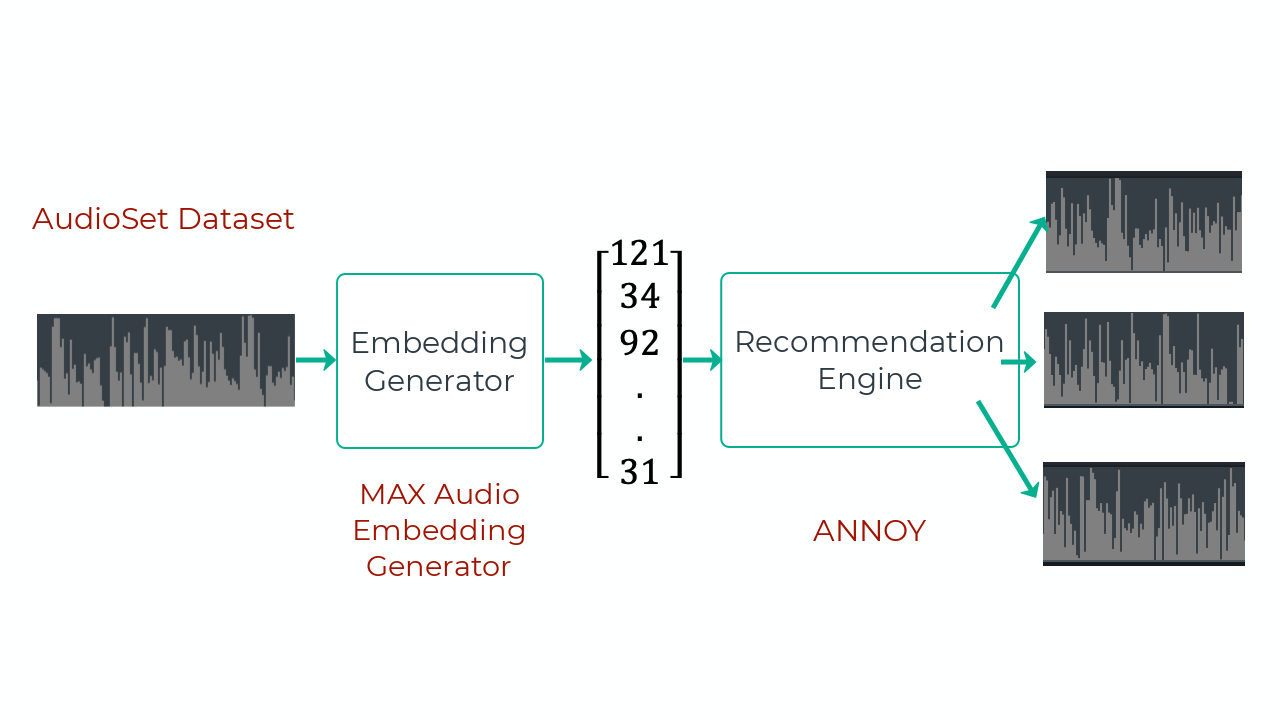

In [62]:
cwd

'D:\\education\\machine learning\\projects\\spotify'

# AUDIO PROCESSING IN THIS FILE

In [63]:
import numpy as np
import json
import tensorflow as tf
import os
import pandas as pd

our data is stored in the directory with name as "audioset_v1_embeddings/eval", so we are putting them in a list

In [64]:
directory = "audioset_v1_embeddings/eval"

dataset = []
for file_name in os.listdir(directory):
     if file_name.endswith(".tfrecord"):
            dataset.append(os.path.join(directory,file_name))

In [65]:
dataset

['audioset_v1_embeddings/eval\\--.tfrecord',
 'audioset_v1_embeddings/eval\\-0.tfrecord',
 'audioset_v1_embeddings/eval\\-1.tfrecord',
 'audioset_v1_embeddings/eval\\-2.tfrecord',
 'audioset_v1_embeddings/eval\\-3.tfrecord',
 'audioset_v1_embeddings/eval\\-4.tfrecord',
 'audioset_v1_embeddings/eval\\-5.tfrecord',
 'audioset_v1_embeddings/eval\\-6.tfrecord',
 'audioset_v1_embeddings/eval\\-7.tfrecord',
 'audioset_v1_embeddings/eval\\-8.tfrecord',
 'audioset_v1_embeddings/eval\\-9.tfrecord',
 'audioset_v1_embeddings/eval\\-a.tfrecord',
 'audioset_v1_embeddings/eval\\-b.tfrecord',
 'audioset_v1_embeddings/eval\\-C.tfrecord',
 'audioset_v1_embeddings/eval\\-D.tfrecord',
 'audioset_v1_embeddings/eval\\-e.tfrecord',
 'audioset_v1_embeddings/eval\\-f.tfrecord',
 'audioset_v1_embeddings/eval\\-g.tfrecord',
 'audioset_v1_embeddings/eval\\-H.tfrecord',
 'audioset_v1_embeddings/eval\\-I.tfrecord',
 'audioset_v1_embeddings/eval\\-J.tfrecord',
 'audioset_v1_embeddings/eval\\-k.tfrecord',
 'audioset

In [66]:
len(dataset)

1444

In [67]:
tf.compat.v1.enable_eager_execution()

In [68]:
#this is how we work on .tf data

In [69]:
raw_dataset = tf.data.TFRecordDataset(dataset)

In [70]:
raw_dataset

<TFRecordDatasetV2 element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [71]:
class_labels = pd.read_csv('class_labels_indices.csv')
labels = class_labels['display_name'].tolist()

music_class = class_labels[class_labels['display_name'].str.contains('Music', case=False)]
music_labels = music_class['index'].tolist()

In [72]:
#exploring dataset

In [73]:
class_labels #file and their associated label

,index,mid,display_name
0,0,/m/09x0r,Speech
1,1,/m/05zppz,"Male speech, man speaking"
2,2,/m/02zsn,"Female speech, woman speaking"
3,3,/m/0ytgt,"Child speech, kid speaking"
4,4,/m/01h8n0,Conversation
...,...,...,...
522,522,/m/07p_0gm,Throbbing
523,523,/m/01jwx6,Vibration
524,524,/m/07c52,Television
525,525,/m/06bz3,Radio


In [74]:
labels#all different labels of the available data 

['Speech',
 'Male speech, man speaking',
 'Female speech, woman speaking',
 'Child speech, kid speaking',
 'Conversation',
 'Narration, monologue',
 'Babbling',
 'Speech synthesizer',
 'Shout',
 'Bellow',
 'Whoop',
 'Yell',
 'Battle cry',
 'Children shouting',
 'Screaming',
 'Whispering',
 'Laughter',
 'Baby laughter',
 'Giggle',
 'Snicker',
 'Belly laugh',
 'Chuckle, chortle',
 'Crying, sobbing',
 'Baby cry, infant cry',
 'Whimper',
 'Wail, moan',
 'Sigh',
 'Singing',
 'Choir',
 'Yodeling',
 'Chant',
 'Mantra',
 'Male singing',
 'Female singing',
 'Child singing',
 'Synthetic singing',
 'Rapping',
 'Humming',
 'Groan',
 'Grunt',
 'Whistling',
 'Breathing',
 'Wheeze',
 'Snoring',
 'Gasp',
 'Pant',
 'Snort',
 'Cough',
 'Throat clearing',
 'Sneeze',
 'Sniff',
 'Run',
 'Shuffle',
 'Walk, footsteps',
 'Chewing, mastication',
 'Biting',
 'Gargling',
 'Stomach rumble',
 'Burping, eructation',
 'Hiccup',
 'Fart',
 'Hands',
 'Finger snapping',
 'Clapping',
 'Heart sounds, heartbeat',
 'Heart m

In [75]:
class_labels['display_name'][137]

'Music'

In [76]:
music_class #all the examples containing some kind of music

,index,mid,display_name
137,137,/m/04rlf,Music
138,138,/m/04szw,Musical instrument
152,152,/m/05148p4,Keyboard (musical)
216,216,/m/064t9,Pop music
217,217,/m/0glt670,Hip hop music
219,219,/m/06by7,Rock music
227,227,/m/0gywn,Soul music
230,230,/m/015y_n,Swing music
233,233,/m/02w4v,Folk music
234,234,/m/06j64v,Middle Eastern music


In [77]:
music_labels#all the examples containing some kind of music and their index

[137,
 138,
 152,
 216,
 217,
 219,
 227,
 230,
 233,
 234,
 237,
 239,
 240,
 245,
 246,
 247,
 248,
 249,
 252,
 253,
 254,
 256,
 258,
 259,
 260,
 261,
 262,
 264,
 265,
 267,
 268,
 269,
 270,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282]

In [78]:
#for a single sample
Sample1 = tf.train.SequenceExample()
Sample1.ParseFromString(raw_record.numpy())
Sample1
#a single example looks like this containing different imformation about audio like end_time_sec, labels, url_info, audio_embeddings etc and now needs to be seperated for working

context {
  feature {
    key: "end_time_seconds"
    value {
      float_list {
        value: 50.0
      }
    }
  }
  feature {
    key: "labels"
    value {
      int64_list {
        value: 189
        value: 190
        value: 191
        value: 193
        value: 194
      }
    }
  }
  feature {
    key: "start_time_seconds"
    value {
      float_list {
        value: 40.0
      }
    }
  }
  feature {
    key: "video_id"
    value {
      bytes_list {
        value: "__LU8E6dUsI"
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "audio_embedding"
    value {
      feature {
        bytes_list {
          value: "\234C\230k\233\027\256\334\242g\316CI\241r\260\377g\302\334\225bjy\210U\215q\250k\365W\227\255\234\\\250\341\271X\273q\026\325\304i\256Z\027\221\26473ayg\260rH\304\331\217g\211\260y\253\000\000a\377dl\221A~0\014W\275\246W\000y\2067;\350\323L\263M\002\000\263\335\232\336\351\320y\377\235e\252\355gq\370\234\000\205\010\000\377\236u!\213\000F\000{\304\364g\2

In [79]:
audios = []
counter = 0
NUM_SECONDS = 10

for raw_record in raw_dataset:
    example = tf.train.SequenceExample()
    example.ParseFromString(raw_record.numpy())
    
    # Audio Meta data
    audio_labels = example.context.feature['labels'].int64_list.value
    start_time = example.context.feature['start_time_seconds'].float_list.value
    end_time = example.context.feature['end_time_seconds'].float_list.value
    video_id = example.context.feature['video_id'].bytes_list.value
    
    if not (set(music_labels) & set(audio_labels)):
        continue

    # Audio Feature
    feature_list = example.feature_lists.feature_list['audio_embedding'].feature
    final_features = [list(feature.bytes_list.value[0]) for feature in feature_list]
    audio_embedding = [item for sublist in final_features[:NUM_SECONDS] for item in sublist]
    
    if len(final_features) < NUM_SECONDS:
        continue
    
    audio = {
        'label': audio_labels,
        'video_id': video_id[0],
        'start_time': start_time[0],
        'end_time': end_time[0],
        'data': audio_embedding
    }
    
    audios.append(audio)
    counter += 1
    if counter % 100 == 0:
        print(f"Processing {counter}th file ...")

Processing 100th file ...
Processing 200th file ...
Processing 300th file ...
Processing 400th file ...
Processing 500th file ...
Processing 600th file ...
Processing 700th file ...
Processing 800th file ...
Processing 900th file ...
Processing 1000th file ...
Processing 1100th file ...
Processing 1200th file ...
Processing 1300th file ...
Processing 1400th file ...
Processing 1500th file ...
Processing 1600th file ...
Processing 1700th file ...
Processing 1800th file ...
Processing 1900th file ...
Processing 2000th file ...
Processing 2100th file ...


In [80]:
len(audio)

5

In [81]:
audio # label info, url info, start and end tume and embeddings

{'label': [152, 160],
 'video_id': b'__tbvLNH6FI',
 'start_time': 110.0,
 'end_time': 120.0,
 'data': [180,
  89,
  124,
  42,
  2,
  53,
  93,
  255,
  88,
  169,
  142,
  75,
  38,
  0,
  65,
  0,
  4,
  255,
  186,
  255,
  175,
  255,
  0,
  34,
  150,
  182,
  94,
  255,
  255,
  255,
  187,
  0,
  0,
  132,
  45,
  0,
  243,
  138,
  18,
  199,
  255,
  204,
  0,
  255,
  255,
  218,
  255,
  20,
  255,
  0,
  255,
  0,
  0,
  201,
  145,
  0,
  91,
  115,
  0,
  6,
  245,
  255,
  61,
  255,
  26,
  0,
  0,
  223,
  255,
  157,
  40,
  0,
  255,
  203,
  0,
  255,
  239,
  0,
  0,
  255,
  255,
  223,
  25,
  255,
  0,
  0,
  255,
  0,
  255,
  28,
  255,
  255,
  255,
  255,
  0,
  47,
  255,
  255,
  255,
  160,
  0,
  178,
  0,
  191,
  0,
  161,
  0,
  219,
  216,
  226,
  255,
  76,
  145,
  42,
  26,
  150,
  129,
  226,
  255,
  6,
  67,
  0,
  255,
  170,
  255,
  135,
  255,
  0,
  195,
  109,
  162,
  36,
  8,
  96,
  88,
  255,
  6,
  231,
  52,
  107,
  108,
  89,
  

In [84]:
len(audios)#collection of audio

2104

In [90]:
len(audios[1])

5

In [89]:
len(audios[1]['data'])

1280

In [91]:
#saving audio data in json file for futher processing

In [92]:
with open('music_set.json', 'w') as file:
    str_audio = repr(audios)
    json.dump(str_audio, file)

In [93]:
[audio['data'][:10] for audio in audios[:4]]

[[183, 64, 127, 102, 127, 112, 147, 126, 181, 165],
 [94, 67, 168, 129, 133, 60, 217, 25, 120, 140],
 [161, 95, 103, 93, 166, 0, 138, 169, 168, 126],
 [180, 52, 94, 114, 136, 89, 230, 189, 169, 26]]